In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
transData = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
transData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
transData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
transData['DATE'] = pd.to_datetime(transData['DATE'], origin="1899-12-30", unit='D')

In [7]:
transData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
transData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [9]:
transData.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
print(transData.DATE.min(), transData.DATE.max())

2018-07-01 00:00:00 2019-06-30 00:00:00


In [11]:
dates = transData[['DATE']]
dates.drop_duplicates('DATE', inplace = True)
dates['month'] = transData['DATE'].dt.month_name()
#transData['month'] = pd.DatetimeIndex(transData['DATE']).month
#transData['DATE'].dt.month_name()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
dates.head()

,DATE,month
0,2018-10-17,October
1,2019-05-14,May
2,2019-05-20,May
3,2018-08-17,August
4,2018-08-18,August


In [13]:
month_sales_count = dates.groupby('month').count()

In [14]:
month_sales_count

,DATE
month,
April,30
August,31
December,30
February,28
January,31
July,31
June,30
March,31
May,31


# All the months have count as per the no.of days except 'December'. December seems to have data for 30 days instead of 31.

In [15]:
december_data = dates[dates.month == 'December']

In [16]:
december_data.sort_values(['DATE'])

,DATE,month
461,2018-12-01,December
284,2018-12-02,December
447,2018-12-03,December
396,2018-12-04,December
314,2018-12-05,December
869,2018-12-06,December
564,2018-12-07,December
1693,2018-12-08,December
341,2018-12-09,December
448,2018-12-10,December


# Seems like 25th December has no Entries.

In [17]:
Txn_sales = transData.groupby('TXN_ID')['TOT_SALES'].sum()
Txn_sales

TXN_ID
1           6.0
2           2.7
3           3.6
4           3.0
5           1.9
6           2.8
7           3.8
8           2.7
9           5.7
10          8.8
11          5.1
12          6.2
13          5.1
14          3.8
15          2.9
16          5.7
17          4.6
18          3.9
19          4.2
20          4.4
21          4.2
22          4.6
23          3.0
24          2.4
25          3.1
26          2.6
27          5.7
28          3.1
29          4.6
30          3.0
           ... 
270180      9.2
270181      7.6
270182      7.4
270183      8.8
270184      6.6
270185      7.6
270186      7.6
270187      8.8
270188      7.8
270189      8.8
270190      8.8
270191      7.4
270192     10.8
270193     10.8
270194     10.8
270195      4.6
270196      9.2
270197      7.6
270198     11.4
270199     11.4
270200      9.2
270201      7.4
270202      7.4
270204      8.4
270205      8.4
270206      8.4
270207      7.6
270208      7.4
270209      6.6
2415841    10.8
Name: TOT_SALES, 

In [18]:
product_sales = transData.groupby('PROD_NAME')['TOT_SALES'].sum()
print(product_sales)

PROD_NAME
Burger Rings 220g                            6831.0
CCs Nacho Cheese    175g                     5961.9
CCs Original 175g                            6048.0
CCs Tasty Cheese    175g                     6069.0
Cheetos Chs & Bacon Balls 190g               9243.3
Cheetos Puffs 165g                           7641.2
Cheezels Cheese 330g                        34296.9
Cheezels Cheese Box 125g                     5733.0
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Dorito Corn Chp     Supreme 380g            40352.0
Doritos Cheese      Supreme 330g            33390.6
Doritos Corn Chip Mexican Jalapeno 150g     23887.5
Doritos Corn Chip Southern Chicken 150g     23735.4
Doritos Corn Chips  Cheese Supreme 170g     27183.2
Doritos Corn Chips  Nacho Cheese 170g       26562.8
Doritos Corn Chips  Original 170g           26228.4
Doritos Mexicana    170g                    26290.0
Do

In [19]:
txn_products = transData.groupby('TXN_ID')['PROD_QTY'].sum()
txn_products

TXN_ID
1          2
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          1
10         2
11         1
12         2
13         1
14         1
15         1
16         1
17         1
18         1
19         2
20         1
21         1
22         1
23         1
24         1
25         1
26         1
27         1
28         1
29         1
30         1
          ..
270180     2
270181     2
270182     2
270183     2
270184     2
270185     2
270186     2
270187     2
270188     2
270189     2
270190     2
270191     2
270192     2
270193     2
270194     2
270195     1
270196     2
270197     2
270198     2
270199     2
270200     2
270201     2
270202     2
270204     2
270205     2
270206     2
270207     2
270208     2
270209     2
2415841    2
Name: PROD_QTY, Length: 263127, dtype: int64

In [20]:
txn_products_name = transData.groupby('TXN_ID')['PROD_NAME'].apply(list)
txn_products_name

TXN_ID
1            [Natural Chip        Compny SeaSalt175g]
2             [Red Rock Deli Chikn&Garlic Aioli 150g]
3             [Grain Waves Sour    Cream&Chives 210G]
4            [Natural ChipCo      Hony Soy Chckn175g]
5                    [WW Original Stacked Chips 160g]
6                                [Cheetos Puffs 165g]
7          [Infuzions SourCream&Herbs Veg Strws 110g]
8               [RRD SR Slow Rst     Pork Belly 150g]
9                  [Doritos Cheese      Supreme 330g]
10                         [Doritos Mexicana    170g]
11          [Old El Paso Salsa   Dip Tomato Med 300g]
12            [GrnWves Plus Btroot & Chilli Jam 180g]
13          [Old El Paso Salsa   Dip Tomato Med 300g]
14         [Infuzions SourCream&Herbs Veg Strws 110g]
15          [Smiths Crinkle Cut  Chips Barbecue 170g]
16                 [Doritos Cheese      Supreme 330g]
17         [Kettle Sensations   Camembert & Fig 150g]
18          [Doritos Corn Chip Southern Chicken 150g]
19                   

In [21]:
Pro_qty_sold = transData.groupby('PROD_NAME')['PROD_QTY'].sum()
Pro_qty_sold

PROD_NAME
Burger Rings 220g                           2970
CCs Nacho Cheese    175g                    2839
CCs Original 175g                           2880
CCs Tasty Cheese    175g                    2890
Cheetos Chs & Bacon Balls 190g              2801
Cheetos Puffs 165g                          2729
Cheezels Cheese 330g                        6017
Cheezels Cheese Box 125g                    2730
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Sour Crm  &Chives Chips 110g      6038
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Dorito Corn Chp     Supreme 380g            6509
Doritos Cheese      Supreme 330g            5858
Doritos Corn Chip Mexican Jalapeno 150g     6125
Doritos Corn Chip Southern Chicken 150g     6086
Doritos Corn Chips  Cheese Supreme 170g     6180
Doritos Corn Chips  Nacho Cheese 170g       6037
Doritos Corn Chips  Original 170g           5961
Doritos Mexicana    170g                    5975
Doritos Salsa       Medium 300g             2735
Doritos Sa

# Understanding the product name column by identifying the 'Chips'

In [24]:
transData.DATE.describe()

count                  264836
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [19]:
transData.PROD_NAME.describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [16]:
product_chips = transData[transData['PROD_NAME'].str.contains('Chip|Chips', case = False)]
print(product_chips)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
6      2019-05-16          4            4149    3333        16   
8      2018-08-20          5            5026    4525        42   
10     2019-05-17          7            7215    7176        16   
14     2019-05-15         19           19272   16686        44   
18     2018-08-17         22           22456   18696        93   
26     2018-08-19         39           39167   35638       111   
33     2019-05-18         45           45220   41651        22   
38     2018-08-18         54           54305   48301        44   
40     2019-05-14         55           55072   48883       106   
52     2019-05-20         71           71122   69717        40   
57     2019-05-14         75           75091   73751        42   
68     201

In [17]:
product_chip_sales = product_chips.groupby('PROD_NAME')['TOT_SALES'].sum()
print(product_chip_sales)

PROD_NAME
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Doritos Corn Chip Mexican Jalapeno 150g     23887.5
Doritos Corn Chip Southern Chicken 150g     23735.4
Doritos Corn Chips  Cheese Supreme 170g     27183.2
Doritos Corn Chips  Nacho Cheese 170g       26562.8
Doritos Corn Chips  Original 170g           26228.4
French Fries Potato Chips 175g               7929.0
Natural Chip        Compny SeaSalt175g       8331.0
Natural Chip Co     Tmato Hrb&Spce 175g      8934.0
Natural ChipCo      Hony Soy Chckn175g       8274.0
Natural ChipCo Sea  Salt & Vinegr 175g       8733.0
Smiths Chip Thinly  Cut Original 175g        9135.0
Smiths Chip Thinly  CutSalt/Vinegr175g       8196.0
Smiths Chip Thinly  S/Cream&Onion 175g       8313.0
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Smiths Crinkle Cut  Chips Barbecue 170g      8125.8
Smiths Crinkle Cut  Chips Chicken 170g       8183.8
Sm

In [20]:
product_chips.PROD_NAME.describe()

count                                        74570
unique                                          33
top       Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
freq                                          3269
Name: PROD_NAME, dtype: object

In [23]:
product_chips.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,74570.000000,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000
mean,135.457651,1.359095e+05,135533.580448,50.651039,1.904264,6.860511
std,76.753058,8.025342e+04,77960.794363,32.792579,0.343675,2.256661
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.013000e+04,68237.250000,27.000000,2.000000,5.800000
50%,131.000000,1.311975e+05,135503.500000,42.000000,2.000000,6.600000
75%,203.000000,2.032402e+05,203284.250000,78.000000,2.000000,7.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000


In [24]:
product_chips.isnull()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False
18,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False
33,False,False,False,False,False,False,False,False


In [25]:
product_chip_sales = product_chips.groupby('PROD_NAME')['TOT_SALES'].sum()
print(product_chip_sales)

PROD_NAME
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Doritos Corn Chip Mexican Jalapeno 150g     23887.5
Doritos Corn Chip Southern Chicken 150g     23735.4
Doritos Corn Chips  Cheese Supreme 170g     27183.2
Doritos Corn Chips  Nacho Cheese 170g       26562.8
Doritos Corn Chips  Original 170g           26228.4
French Fries Potato Chips 175g               7929.0
Natural Chip        Compny SeaSalt175g       8331.0
Natural Chip Co     Tmato Hrb&Spce 175g      8934.0
Natural ChipCo      Hony Soy Chckn175g       8274.0
Natural ChipCo Sea  Salt & Vinegr 175g       8733.0
Smiths Chip Thinly  Cut Original 175g        9135.0
Smiths Chip Thinly  CutSalt/Vinegr175g       8196.0
Smiths Chip Thinly  S/Cream&Onion 175g       8313.0
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Smiths Crinkle Cut  Chips Barbecue 170g      8125.8
Smiths Crinkle Cut  Chips Chicken 170g       8183.8
Sm

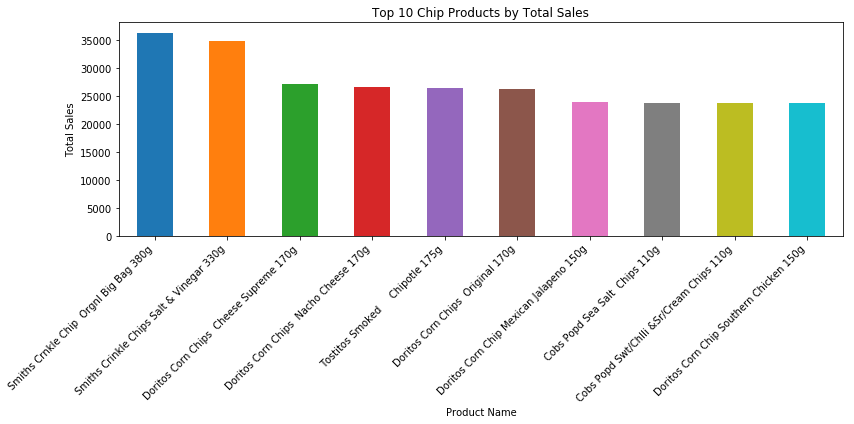

In [27]:
# Plotting Top 10 Chip Products by Total Sales
plt.figure(figsize=(12, 6))
product_chip_sales.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Chip Products by Total Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
null_counts = product_chips.isnull().sum()
null_counts

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [36]:
purchaseData = pd.read_csv('QVI_purchase_behaviour.csv')
purchaseData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [26]:
purchaseData.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [27]:
completeData = pd.merge(transData, purchaseData, on = 'LYLTY_CARD_NBR')

In [28]:
completeData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [29]:
completeData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [30]:
completeData.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [31]:
completeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
DATE                264836 non-null datetime64[ns]
STORE_NBR           264836 non-null int64
LYLTY_CARD_NBR      264836 non-null int64
TXN_ID              264836 non-null int64
PROD_NBR            264836 non-null int64
PROD_NAME           264836 non-null object
PROD_QTY            264836 non-null int64
TOT_SALES           264836 non-null float64
LIFESTAGE           264836 non-null object
PREMIUM_CUSTOMER    264836 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


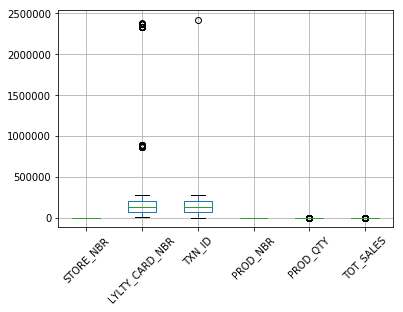

In [32]:
cols = completeData.columns
cols
bplot = completeData.boxplot(column = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 
                                       'PROD_NBR', 'PROD_QTY', 'TOT_SALES'], rot = 45)
plt.show()

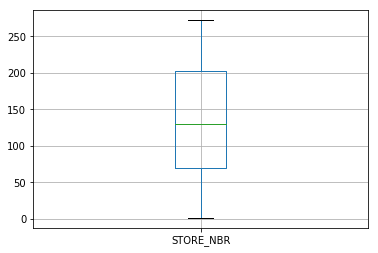

In [33]:
bplot1 = completeData.boxplot(column = ['STORE_NBR'])
plt.show()

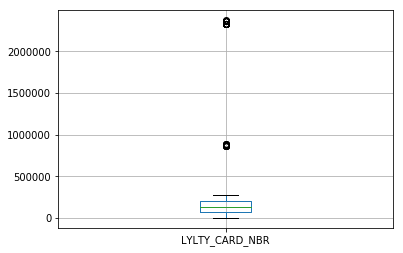

In [34]:
bplot2 = completeData.boxplot(column = ['LYLTY_CARD_NBR'])
plt.show()

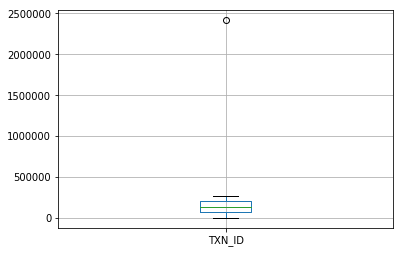

In [35]:
bplot3 = completeData.boxplot(column = ['TXN_ID'])
plt.show()

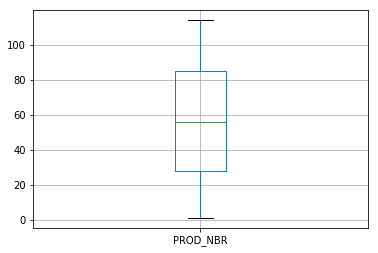

In [36]:
bplot4 = completeData.boxplot(column = ['PROD_NBR'])
plt.show()

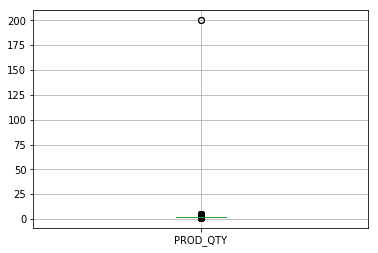

In [37]:
bplot5 = completeData.boxplot(column = ['PROD_QTY'])
plt.show()

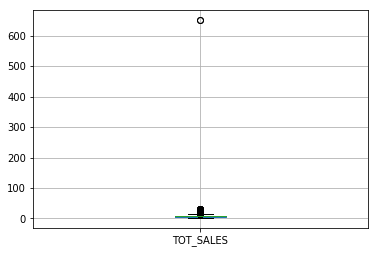

In [38]:
bplot6 = completeData.boxplot(column = ['TOT_SALES'])
plt.show()